In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pandas 交叉表与透视表

* 交叉表（cross-tabulation，简称crosstab）是一种用于计算分组频率的特殊透视表
* 透视表（pivot table）是一种常见的数据汇总工具，它根据一个或多个键对数据进行聚合，并根据行和列上的分组键将数据分配到各个矩形区域中。

## 1 交叉表与透视表的作用
* 交叉表：交叉表用于计算一列数据对于另外一列数据的分组个数
    * 用于统计分组频率的特殊透视表
    * pd.crosstab(value1, value2)
    
    
* 透视表：透视表是将原有的DataFrame的列分别作为行索引和列索引，然后对指定的列应用聚集函数
    * df.pivot_table(values,index,columns,aggfunc='mean'）

## 2 案例分析

我们使用股票数据(stock_data),假设现在我们想要知道在不同工作日（周一到周五）时，这只股票是涨是跌？比如，在周一这只股票有53%的概率涨了，47%的概率跌了，这样类似的数据。

1. **第一种思路：**
    * 首先需要把日期转换为星期几，然后合并到原表中
    * 股票涨跌的数据是在‘p_change’列，我们需要新加一列来判断，如果p_change大于0，结果就为1，否则为0
    * 使用交叉表crosstab来寻找两列的数据个数关系
    * 然后进行算术运算，算出比例

In [2]:
# 导入数据
stock_data = pd.read_csv('../data/stock_day.csv')
stock_data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76


In [3]:
# 筛选有用的列，形成新的DataFrame
data = pd.DataFrame(stock_data.loc[:, 'p_change'])
data

,p_change
2018-02-27,2.68
2018-02-26,3.02
2018-02-23,2.42
2018-02-22,1.64
2018-02-14,2.05
...,...
2015-03-06,8.51
2015-03-05,2.02
2015-03-04,1.57
2015-03-03,1.44


In [4]:
# 转换日期变为星期几
date = pd.to_datetime(data.index).weekday
data['weekday'] = date
data.head()

,p_change,weekday
2018-02-27,2.68,1
2018-02-26,3.02,0
2018-02-23,2.42,4
2018-02-22,1.64,3
2018-02-14,2.05,2


In [5]:
# 新增一列，根据p_change来判断股票是否涨跌
data['pos_neg'] = np.where(data['p_change'] > 0, 1, 0)
data.head(10)

,p_change,weekday,pos_neg
2018-02-27,2.68,1,1
2018-02-26,3.02,0,1
2018-02-23,2.42,4,1
2018-02-22,1.64,3,1
2018-02-14,2.05,2,1
2018-02-13,1.32,1,1
2018-02-12,4.03,0,1
2018-02-09,-6.86,4,0
2018-02-08,0.41,3,1
2018-02-07,-2.24,2,0


In [6]:
# 通过交叉表来找寻两列数据个数的关系
count = pd.crosstab(data['weekday'], data['pos_neg'])
count

pos_neg,0,1
weekday,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [7]:
# 算术运算，先求和
sum = count.sum(axis=1)
sum

weekday
0    125
1    131
2    132
3    128
4    127
dtype: int64

In [8]:
# 进行相除操作，得出比例
result = count.div(sum, axis=0)
result

pos_neg,0,1
weekday,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


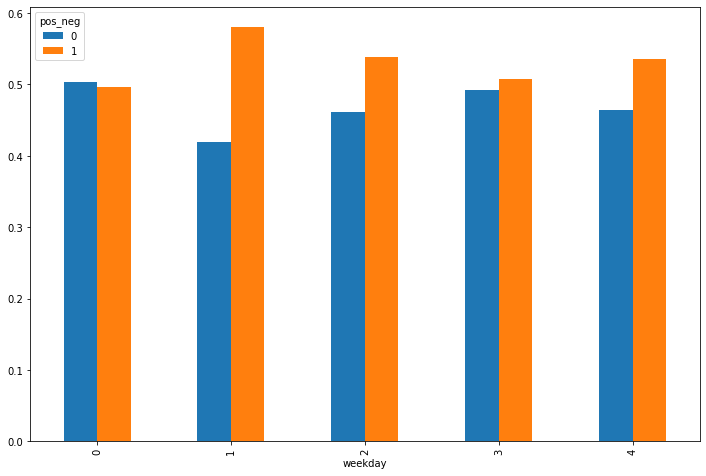

In [9]:
# 画出柱状图来显示结果
result.plot(kind='bar', figsize=(12, 8))

我们经过统计计算发现，星期二这只股票涨的概率为58%，是为最大。


**2. 第二种思路：**
* 直接使用透视表（pivot table），更加简单

In [10]:
# 使用pivot table进行操作
data.pivot_table(['pos_neg'], index='weekday')

,pos_neg
weekday,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


假设我们现在还想要知道，这只股票周一到周五，如果涨了的话，平均涨了多少（或者一共涨了多少），如果跌了，平均跌了多少（或者一共跌了多少）

In [11]:
# 使用pivot_table进行计算平均值
data.pivot_table(['p_change'], index='weekday', columns='pos_neg')

p_change          
pos_neg         0         1
weekday                    
0       -3.800476  2.764516
1       -3.212727  3.100526
2       -2.628525  2.897042
3       -2.537778  3.537231
4       -2.878644  2.733676

In [12]:
# 使用pivot_table进行计算sum
data.pivot_table(['p_change'], index='weekday',
                 columns='pos_neg', aggfunc='sum')

p_change        
pos_neg        0       1
weekday                 
0        -239.43  171.40
1        -176.70  235.64
2        -160.34  205.69
3        -159.88  229.92
4        -169.84  185.89